# Porject 2

## Project Description

In this project, we will use the Fashion-MNIST dataset using a CNN neural 
network architecture.

---

Most of details about `fashion-mnist` data comes from the official documentation: https://github.com/zalandoresearch/fashion-mnist

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.model_selection import train_test_split, StratifiedKFold

import tensorflow as tf
from keras import regularizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D, Input, Concatenate, GlobalMaxPooling2D
from keras.optimizers import Adam, schedules
from keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from keras.callbacks import EarlyStopping, LearningRateScheduler

!pip install -q -U keras-tuner
import keras_tuner as kt

seed = 42
img_size_target = 32
tf.random.set_seed(seed)

## Data

### Read Data

In [2]:
df = pd.read_csv('fashion-mnist_train.csv')

In [3]:
df.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
df.describe()

label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.247967      0.411467      0.805767      2.198283      5.682000   
std        4.306912      5.836188      8.215169     14.093378     23.819481   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      227.000000    230.000000    224.000000    255.000000    254.000000   

       ...      pixel775      pixel776      pixel777      pixel778  \
count  ...  60000.000000  60000.000000  60000.000000  60000.000000   
mean   ...     34.625400     23.300683     16.588267     17.869433   
std    ...     57.545242     48.854427     41.979611     43.966032   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...     58.000000      9.000000      0.000000      0.000000   
max    ...    255.000000    255.000000    255.000000    255.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean      22.814817     17.911483      8.520633      2.753300      0.855517   
std       51.830477     45.149388     29.614859     17.397652      9.356960   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

          pixel784  
count  60000.00000  
mean       0.07025  
std        2.12587  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        0.00000  
max      170.00000  

[8 rows x 785 columns]

### Data Visualization

<Axes: >

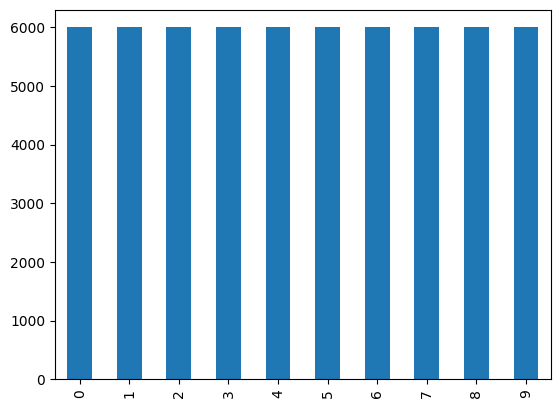

In [6]:
df.label.sort_values().value_counts().plot(kind='bar')

### Check Missing Values
it seems that there is no missing values

In [7]:
# data has no nulls
df.isnull().sum().sum()

0

### Check Duplicates
it seems that there is 43 duplicates

In [8]:
# data has no duplicated rows
df.duplicated().sum()

43

### Preprocessing


### Remove Duplicates

In [9]:
df.drop_duplicates(inplace=True)

### Encode Label 
using one hot encoder

In [10]:
# # Perform one hot encoding of the label column
# one_hot = pd.get_dummies(df['label'])

# # Add the one hot encoded columns to the dataframe
# df1 = pd.concat([df, one_hot], axis=1)

# df1.drop('label', axis=1, inplace=True)

In [11]:
# df1.head()
df.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

### Take a copy

In [12]:
# df2 = df1.copy()
df1 = df.copy()

### Split Data to train and test

In [13]:
# split to features and label
data = np.asarray(df1, dtype=np.float32)
# X = data[:, :-10]
# y = data[:, -10:]
X = data[:, 1:]
y = data[:, 0]

In [14]:
y

array([2., 9., 6., ..., 8., 8., 7.], dtype=float32)

### Reshape data
Convert data from columns form to image matrix 28×28 form
then add padding to be 32×32 because it is the minimum acceptable image size for pretrained models.

In [15]:
# reshape to 28×28
X = X.reshape(-1, 28, 28)
# add padding
X = tf.pad(X, [[0, 0], [2, 2], [2, 2]])
# add the channels dimention so it will become (..., 32, 32, 1) instead of (..., 32, 32)
X = tf.expand_dims(X, axis=3, name=None).numpy()
X.shape

(59957, 32, 32, 1)

### Normalization
dividing by 255

In [16]:
X = X / 255

#### Labels
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |



In [17]:
lebels = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Spite the data
splite the data to training and testing sets.

In [18]:
# split to training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, stratify=y, random_state=seed)

### Display some Images

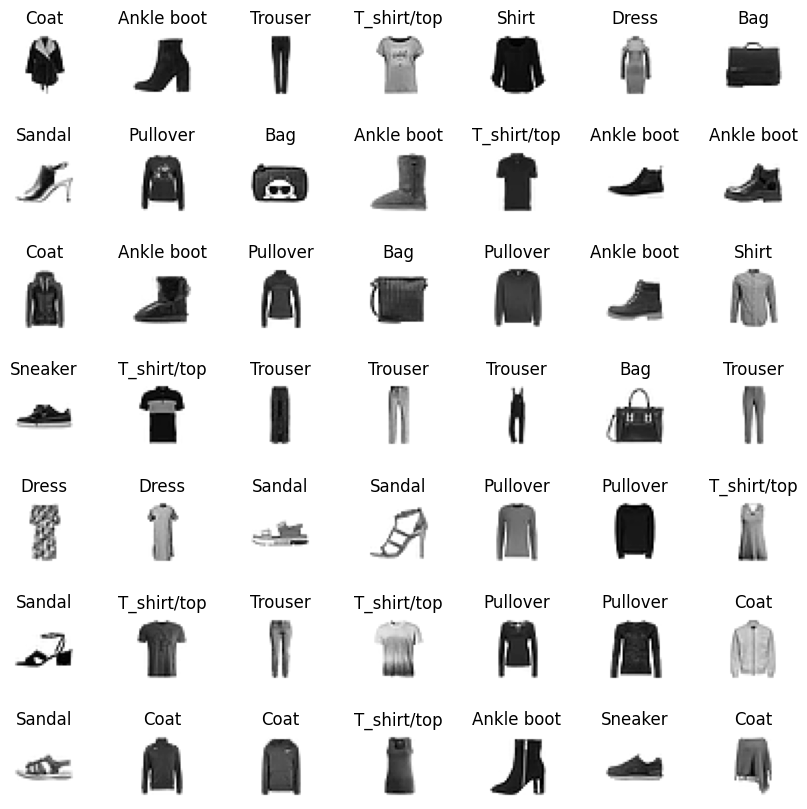

In [19]:
plt.figure(figsize=(10,10))

for index in range(49):
    plt.subplot(7, 7, index+1)
    plt.imshow(X_train[index], cmap='binary')
    plt.title(lebels[int(y_train[index])])
    # plt.title(lebels[int(np.argmax(y_train[index, :]))])
    plt.axis('off')
plt.subplots_adjust(hspace=0.7, wspace=0.8)
plt.show()

## LeNet 5 Model
implement a LeNet-5 network to recognize the Fashion-MNIST.

The LeNet 5 Architecture:

![LeNet 5](https://blog.paperspace.com/content/images/2021/10/image-17.png)

(Source: http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)

The LeNet 5 Convolution Operation:

![Convolution Operation](https://www.researchgate.net/profile/Ihab_S_Mohamed/publication/324165524/figure/fig3/AS:611103423860736@1522709818959/An-example-of-convolution-operation-in-2D-2.png)

(Source: https://www.researchgate.net)

### Split data to train and validation

In [20]:
X_train_tune, X_val_tune, y_train_tune, y_val_tune = train_test_split(X_train, y_train, test_size=0.1, shuffle=True, stratify=y_train, random_state=seed)

### Build Model
Add the ability to tune hyperparameters ex:
- Hidden Layer Size
- Learning Rate

In [21]:
# def scheduler(epoch, lr):
#     if epoch < 10:
#       return lr
#     else:
#       return lr * tf.math.exp(-0.1)

In [22]:
def model_builder(hp):

    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(img_size_target, img_size_target, 1)))
    model.add(MaxPool2D(strides=2))
    model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPool2D(strides=2))
    model.add(Flatten())


    hp_units = hp.Choice('units', values=[60, 120, 240])
    model.add(Dense(hp_units, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model

### Search for the best Hyperparameter
I'm using Keras Tuner for finding the best hyperparameter to train the model.

(source: https://www.tensorflow.org/tutorials/keras/keras_tuner)

In [23]:
def search(model_builder, X_train, y_train, X_val, y_val):
    stop_early = EarlyStopping(monitor='val_loss', patience=5)
    # lr_scheduler = LearningRateScheduler(scheduler)
    tuner = kt.Hyperband(model_builder, objective='val_accuracy', seed=seed, overwrite=True)
    tuner.search(X_train, y_train, validation_data=(X_val, y_val), batch_size=50, callbacks=[stop_early])
    return tuner

In [24]:
tuner = search(model_builder, X_train_tune, y_train_tune, X_val_tune, y_val_tune)

Trial 12 Complete [00h 00m 09s]
val_accuracy: 0.8558458685874939

Best val_accuracy So Far: 0.8662219643592834
Total elapsed time: 00h 02m 17s


#### Best Hyperparameter

In [25]:
# display best hyperparameters found after searching.
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
initial_learning_rate = best_hps.get('learning_rate')

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {initial_learning_rate}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 240 and the optimal learning rate for the optimizer
is 0.001.



### Build Model With best Hyperparameters
Build the model with the best hyperparameters found by keras tuner.


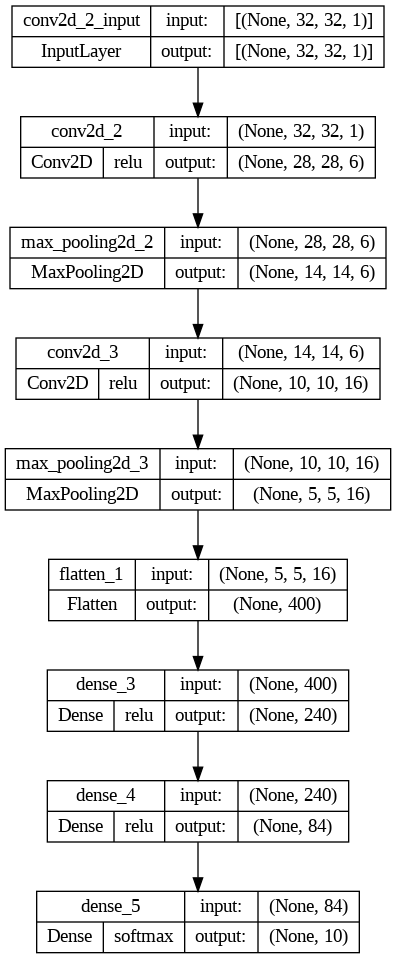

In [26]:
model = tuner.hypermodel.build(best_hps)
plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

### Train the model

In [27]:
# create general function 
def fit(X_train, y_train, X_val, y_val):
    stop_early = EarlyStopping(patience=5)
    # lr_scheduler = LearningRateScheduler(scheduler)
    model = tuner.hypermodel.build(best_hps)
    history = model.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_val, y_val), callbacks=[stop_early])
    return history, model

In [28]:
history, _ = fit(X_train_tune, y_train_tune, X_val_tune, y_val_tune)

Epoch 1/20
486/486 [==============================] - 3s 5ms/step - loss: 0.5770 - accuracy: 0.7934 - val_loss: 0.4260 - val_accuracy: 0.8410
Epoch 2/20
486/486 [==============================] - 2s 4ms/step - loss: 0.3808 - accuracy: 0.8623 - val_loss: 0.3623 - val_accuracy: 0.8659
Epoch 3/20
486/486 [==============================] - 2s 4ms/step - loss: 0.3358 - accuracy: 0.8777 - val_loss: 0.3399 - val_accuracy: 0.8716
Epoch 4/20
486/486 [==============================] - 2s 5ms/step - loss: 0.3042 - accuracy: 0.8888 - val_loss: 0.3304 - val_accuracy: 0.8770
Epoch 5/20
486/486 [==============================] - 2s 5ms/step - loss: 0.2825 - accuracy: 0.8965 - val_loss: 0.2978 - val_accuracy: 0.8862
Epoch 6/20
486/486 [==============================] - 2s 4ms/step - loss: 0.2651 - accuracy: 0.9020 - val_loss: 0.2939 - val_accuracy: 0.8920
Epoch 7/20
486/486 [==============================] - 2s 4ms/step - loss: 0.2525 - accuracy: 0.9066 - val_loss: 0.2919 - val_accuracy: 0.8931
Epoch 

In [29]:
# find best epoch
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 17


#### Diaplay Graphs

In [30]:
def display_accuracy(history):
    plt.figure(figsize=(5,5))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracies')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [31]:
def display_losses(history):
    plt.figure(figsize=(5,5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Losses')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

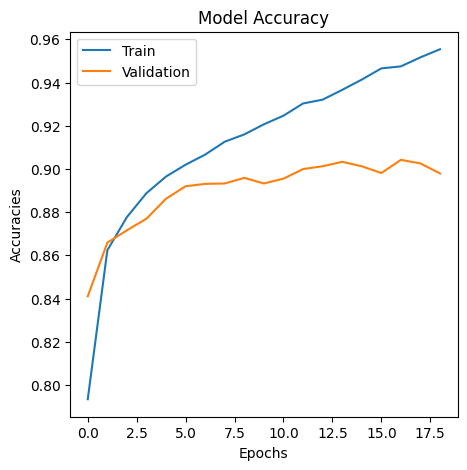

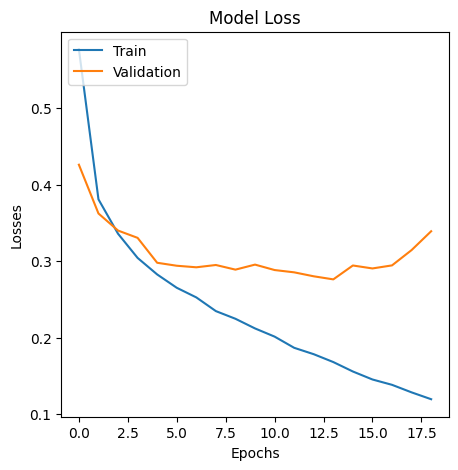

In [32]:
def displayGraphs(history):
    display_accuracy(history)
    print()
    display_losses(history)

displayGraphs(history)

### Evaluate the model

In [33]:
# check model generalization
score = model.evaluate(X_test, y_test)
print(score)
print(f'Score for: {model.metrics_names[0]} of {score[0]}; {model.metrics_names[1]} of {score[1] * 100}%')

188/188 [==============================] - 1s 3ms/step - loss: 2.2916 - accuracy: 0.1941
[2.2916295528411865, 0.19412942230701447]
Score for: loss of 2.2916295528411865; accuracy of 19.412942230701447%


### Cross-Validation
using the KFold

In [34]:
num_folds = 5
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=seed)

*********************************************************************
Start of fold 1 ...

Epoch 1/20
432/432 [==============================] - 5s 8ms/step - loss: 0.6387 - accuracy: 0.7661 - val_loss: 0.4606 - val_accuracy: 0.8373
Epoch 2/20
432/432 [==============================] - 3s 7ms/step - loss: 0.4037 - accuracy: 0.8551 - val_loss: 0.4031 - val_accuracy: 0.8579
Epoch 3/20
432/432 [==============================] - 4s 8ms/step - loss: 0.3476 - accuracy: 0.8733 - val_loss: 0.3356 - val_accuracy: 0.8809
Epoch 4/20
432/432 [==============================] - 2s 5ms/step - loss: 0.3139 - accuracy: 0.8856 - val_loss: 0.3257 - val_accuracy: 0.8858
Epoch 5/20
432/432 [==============================] - 2s 4ms/step - loss: 0.2921 - accuracy: 0.8943 - val_loss: 0.3190 - val_accuracy: 0.8885
Epoch 6/20
432/432 [==============================] - 2s 4ms/step - loss: 0.2730 - accuracy: 0.9002 - val_loss: 0.2976 - val_accuracy: 0.8924
Epoch 7/20
432/432 [==============================] - 2s 

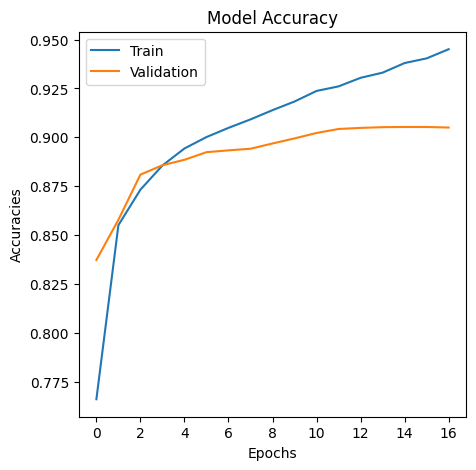

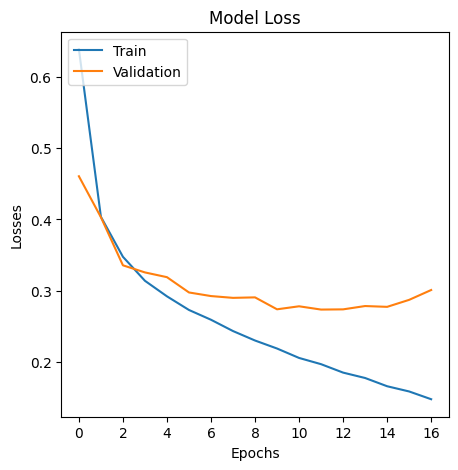


188/188 [==============================] - 1s 3ms/step - loss: 0.2960 - accuracy: 0.9064
[0.29602810740470886, 0.9064376354217529]
Score for fold 1: loss of 0.29602810740470886; accuracy of 90.6437635421753%

End of fold 1 ...
*********************************************************************
*********************************************************************
Start of fold 2 ...

Epoch 1/20
432/432 [==============================] - 3s 5ms/step - loss: 0.6284 - accuracy: 0.7734 - val_loss: 0.4325 - val_accuracy: 0.8474
Epoch 2/20
432/432 [==============================] - 2s 4ms/step - loss: 0.4043 - accuracy: 0.8542 - val_loss: 0.3740 - val_accuracy: 0.8662
Epoch 3/20
432/432 [==============================] - 2s 4ms/step - loss: 0.3541 - accuracy: 0.8708 - val_loss: 0.3526 - val_accuracy: 0.8730
Epoch 4/20
432/432 [==============================] - 2s 6ms/step - loss: 0.3211 - accuracy: 0.8831 - val_loss: 0.3137 - val_accuracy: 0.8892
Epoch 5/20
432/432 [=======================

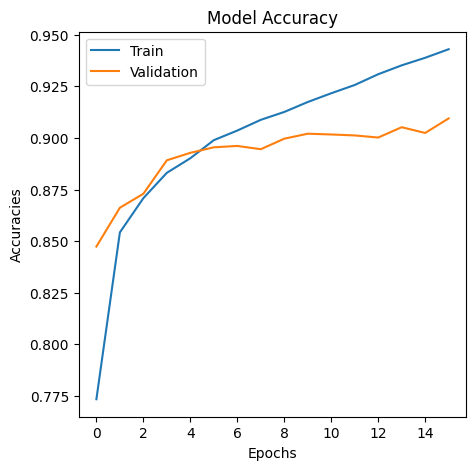

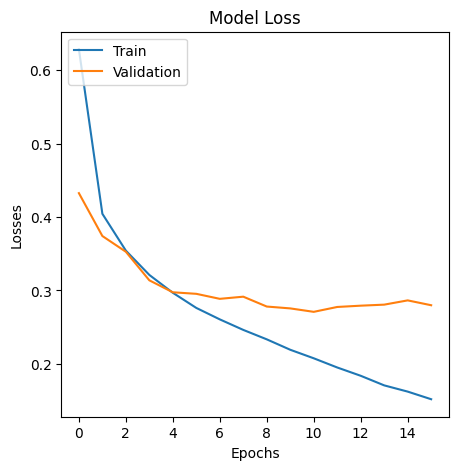


188/188 [==============================] - 1s 4ms/step - loss: 0.2961 - accuracy: 0.9048
[0.296088844537735, 0.9047698378562927]
Score for fold 2: loss of 0.296088844537735; accuracy of 90.47698378562927%

End of fold 2 ...
*********************************************************************
*********************************************************************
Start of fold 3 ...

Epoch 1/20
432/432 [==============================] - 3s 5ms/step - loss: 0.6453 - accuracy: 0.7656 - val_loss: 0.4628 - val_accuracy: 0.8302
Epoch 2/20
432/432 [==============================] - 2s 4ms/step - loss: 0.4125 - accuracy: 0.8513 - val_loss: 0.3958 - val_accuracy: 0.8611
Epoch 3/20
432/432 [==============================] - 2s 4ms/step - loss: 0.3516 - accuracy: 0.8726 - val_loss: 0.3518 - val_accuracy: 0.8745
Epoch 4/20
432/432 [==============================] - 2s 4ms/step - loss: 0.3144 - accuracy: 0.8877 - val_loss: 0.3196 - val_accuracy: 0.8858
Epoch 5/20
432/432 [==========================

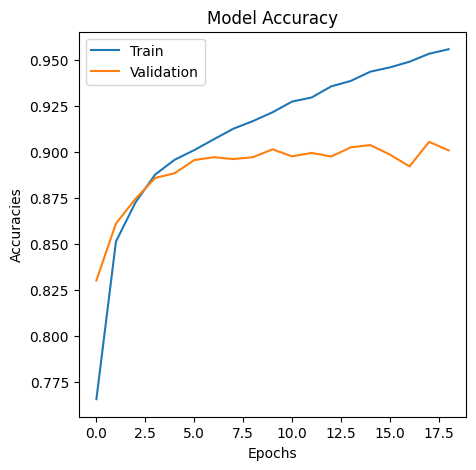

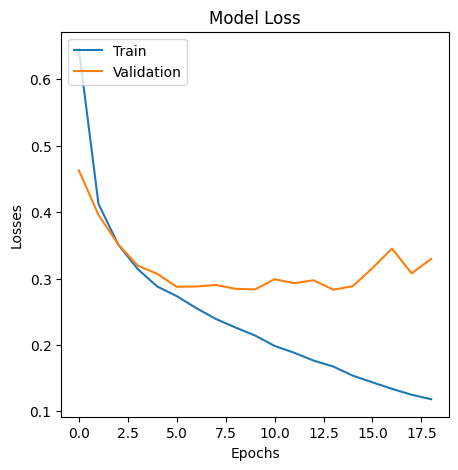


188/188 [==============================] - 1s 3ms/step - loss: 0.2948 - accuracy: 0.9048
[0.2948451340198517, 0.9047698378562927]
Score for fold 3: loss of 0.2948451340198517; accuracy of 90.47698378562927%

End of fold 3 ...
*********************************************************************
*********************************************************************
Start of fold 4 ...

Epoch 1/20
432/432 [==============================] - 3s 6ms/step - loss: 0.6257 - accuracy: 0.7723 - val_loss: 0.4701 - val_accuracy: 0.8334
Epoch 2/20
432/432 [==============================] - 3s 6ms/step - loss: 0.4209 - accuracy: 0.8466 - val_loss: 0.3997 - val_accuracy: 0.8571
Epoch 3/20
432/432 [==============================] - 2s 5ms/step - loss: 0.3666 - accuracy: 0.8671 - val_loss: 0.3514 - val_accuracy: 0.8721
Epoch 4/20
432/432 [==============================] - 2s 4ms/step - loss: 0.3337 - accuracy: 0.8774 - val_loss: 0.3338 - val_accuracy: 0.8788
Epoch 5/20
432/432 [========================

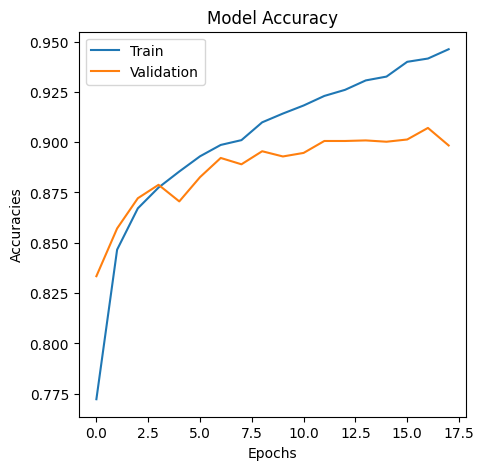

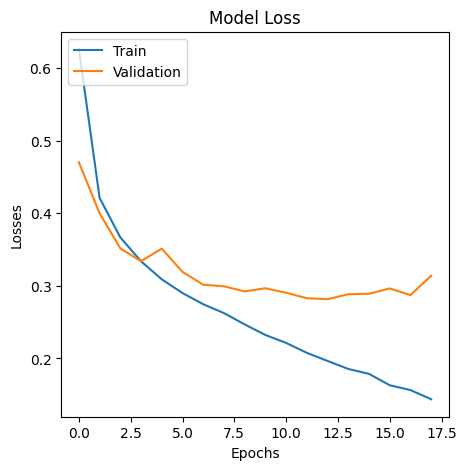


188/188 [==============================] - 1s 3ms/step - loss: 0.3271 - accuracy: 0.8954
[0.32709455490112305, 0.8954302668571472]
Score for fold 4: loss of 0.32709455490112305; accuracy of 89.54302668571472%

End of fold 4 ...
*********************************************************************
*********************************************************************
Start of fold 5 ...

Epoch 1/20
432/432 [==============================] - 3s 5ms/step - loss: 0.6114 - accuracy: 0.7795 - val_loss: 0.4322 - val_accuracy: 0.8478
Epoch 2/20
432/432 [==============================] - 2s 5ms/step - loss: 0.4062 - accuracy: 0.8537 - val_loss: 0.3874 - val_accuracy: 0.8581
Epoch 3/20
432/432 [==============================] - 2s 6ms/step - loss: 0.3535 - accuracy: 0.8714 - val_loss: 0.3660 - val_accuracy: 0.8658
Epoch 4/20
432/432 [==============================] - 2s 5ms/step - loss: 0.3229 - accuracy: 0.8830 - val_loss: 0.3432 - val_accuracy: 0.8739
Epoch 5/20
432/432 [======================

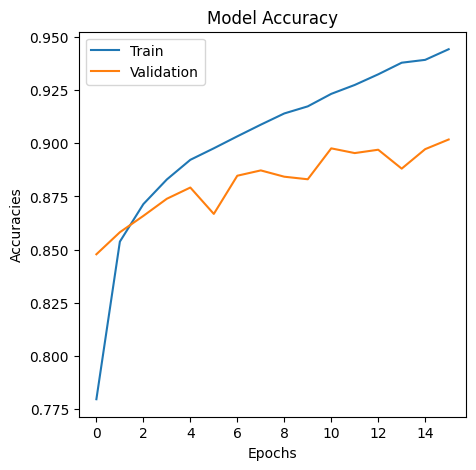

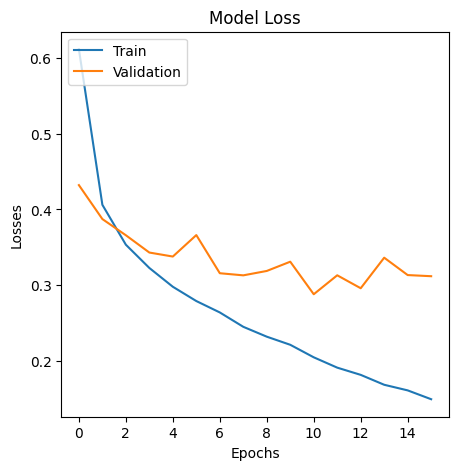


188/188 [==============================] - 1s 4ms/step - loss: 0.3010 - accuracy: 0.9034
[0.3010329306125641, 0.9034356474876404]
Score for fold 5: loss of 0.3010329306125641; accuracy of 90.34356474876404%

End of fold 5 ...
*********************************************************************


In [35]:
fold = 1
models = []
accuracies = []
losses = []
for train, val in kfold.split(X_train, y_train):

    print('*********************************************************************')
    print(f'Start of fold {fold} ...')
    print()

    # Fit data to new model
    history, model = fit(X_train[train], y_train[train], X_train[val], y_train[val])

    print()
    displayGraphs(history)
    print()

    # check model generalization
    scores = model.evaluate(X_test, y_test)
    print(scores)
    print(f'Score for fold {fold}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

    models.append(model)
    accuracies.append(scores[1] * 100)
    losses.append(scores[0])

    print()
    print(f'End of fold {fold} ...')
    print('*********************************************************************')

    # Increase fold number
    fold = fold + 1

#### Display Graphs

In [36]:
def display_fold_accuracy(folds, accuracies):
    plt.figure(figsize=(5,5))
    plt.plot(folds, accuracies)
    # make axis as discrete values
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.title('Model Accuracy')
    plt.ylabel('Accuracies')
    plt.xlabel('Folds')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [37]:
def display_fold_loss(folds, losses):
    plt.figure(figsize=(5,5))
    plt.plot(folds, losses)
    # make axis as discrete values
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.title('Model Loss')
    plt.ylabel('Losses')
    plt.xlabel('Folds')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

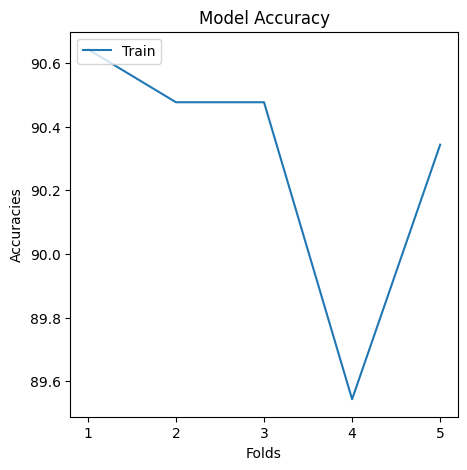

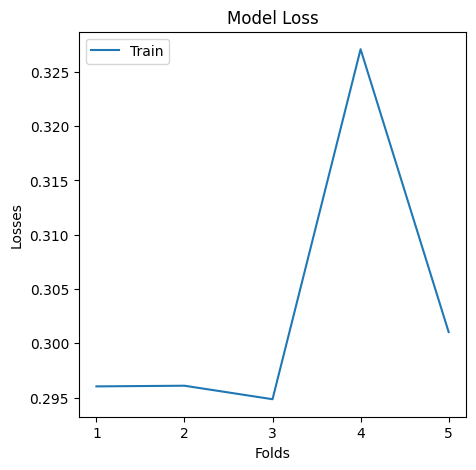

In [38]:
display_fold_accuracy(range(1, num_folds+1), accuracies)
print()
display_fold_loss(range(1, num_folds+1), losses)

### Evaluate the model
I choosed the best model in the graph above

In [46]:
# check model generalization
best_model_cv = 0
score = models[best_model_cv].evaluate(X_test, y_test)
print(score)
print(f'Score for: {models[best_model_cv].metrics_names[0]} of {score[0]}; {models[best_model_cv].metrics_names[1]} of {score[1] * 100}%')

188/188 [==============================] - 1s 3ms/step - loss: 0.2960 - accuracy: 0.9064
[0.29602810740470886, 0.9064376354217529]
Score for: loss of 0.29602810740470886; accuracy of 90.6437635421753%


Graphs show the best evaluation accuracy and loss for each model during the cross validation process

### Comment on why you think LeNet-5 further improves the accuracy if any at all. And if it doesn't, why not? 

As observation, the model improve the accuracy as we tested it above after cross validation.

why? because it contain:
- Convolutional layers
- Subsampling layers
- Nonlinear activation functions
- Weight sharing

in short it follows the CNN architecture which is good for image classification.

---

## Transfer Learning
replace the fully connected layer of a pre-trained model with a fully connected layer suitable with our problem

I will the following three pre-trained model

| Model | Top-1 Accuracy | Top-5 Accuracy | Parameters |
| --- | --- | --- | --- |
| VGG19 | 71.3%	 | 90.0% | 143.7M |
| RESNet152V2 | 78.0%	| 94.2% | 60.4M |
| DenseNet201 | 77.3% | 93.6% | 20.2M	|

(source: https://keras.io/api/applications/)

### VGG19

use a pretrained VGG19 and replace its fully connected network with a new one that I hope it will produce a good accuracy.

#### Build model

In [47]:
from keras.applications import VGG19

def VGG19_builder():

    # convert the 1 dimension gray image to 3 duplicated dimensions to be able to pass them to the model
    img_input = Input(shape=(img_size_target, img_size_target, 1))
    img_conc = Concatenate()([img_input, img_input, img_input])  

    # create the base pre-trained model
    base_model = VGG19(weights='imagenet', include_top=False, input_tensor=img_conc)

    x = base_model.output
    # adding a average pooling layer
    x = GlobalMaxPooling2D()(x)
    # adding a fully-connected layer with relu activation
    x = Dense(256, activation='relu')(x)
    # adding a dropout layer
    x = Dropout(0.4)(x)
    # adding a fully-connected layer with relu activation
    x = Dense(128, activation='relu')(x)
    # adding a dropout layer
    # x = Dropout(0.4)(x)
    # adding the output layer which has 10 classes with a softmax
    predictions = Dense(10, activation='softmax')(x)

    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)

    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all convolutional InceptionV3 layers
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model

#### Display the model

80134624/80134624 [==============================] - 5s 0us/step


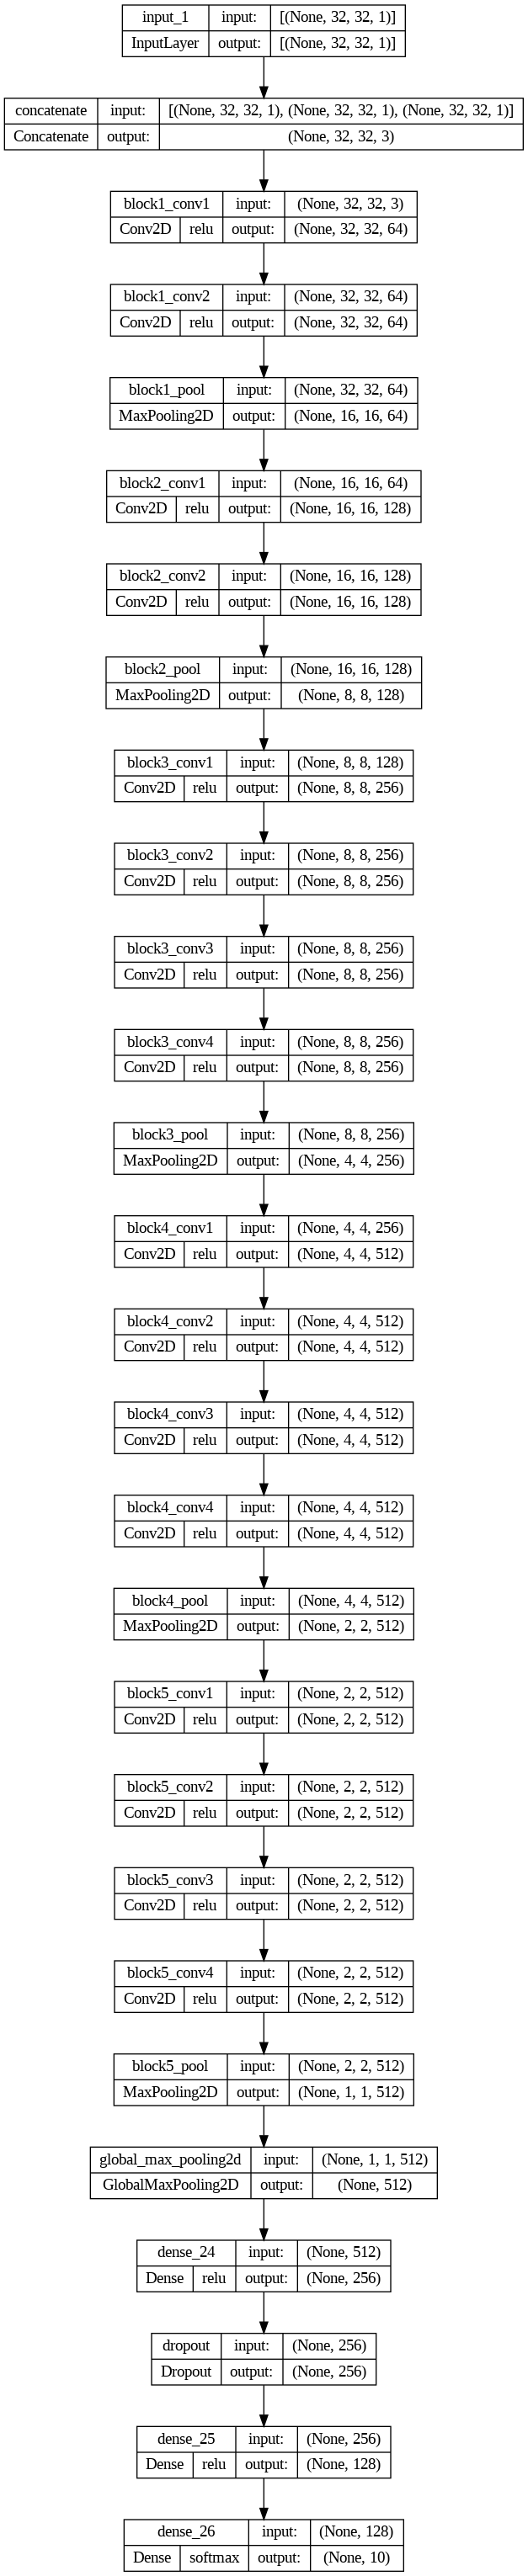

In [48]:
vgg19_model = VGG19_builder()
plot_model(vgg19_model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

#### Train the model

In [50]:
stop_early = EarlyStopping(patience=5)
# lr_scheduler = LearningRateScheduler(scheduler)
vgg_history = vgg19_model.fit(X_train_tune, y_train_tune, epochs=20, batch_size=50, validation_data=(X_val_tune, y_val_tune), callbacks=[stop_early])

Epoch 1/20
972/972 [==============================] - 21s 19ms/step - loss: 0.6428 - accuracy: 0.7684 - val_loss: 0.4603 - val_accuracy: 0.8268
Epoch 2/20
972/972 [==============================] - 16s 17ms/step - loss: 0.4793 - accuracy: 0.8254 - val_loss: 0.4204 - val_accuracy: 0.8425
Epoch 3/20
972/972 [==============================] - 15s 15ms/step - loss: 0.4448 - accuracy: 0.8376 - val_loss: 0.4032 - val_accuracy: 0.8531
Epoch 4/20
972/972 [==============================] - 16s 17ms/step - loss: 0.4228 - accuracy: 0.8457 - val_loss: 0.3999 - val_accuracy: 0.8529
Epoch 5/20
972/972 [==============================] - 15s 15ms/step - loss: 0.4088 - accuracy: 0.8495 - val_loss: 0.3800 - val_accuracy: 0.8596
Epoch 6/20
972/972 [==============================] - 16s 16ms/step - loss: 0.3960 - accuracy: 0.8552 - val_loss: 0.3819 - val_accuracy: 0.8610
Epoch 7/20
972/972 [==============================] - 15s 15ms/step - loss: 0.3851 - accuracy: 0.8593 - val_loss: 0.3835 - val_accuracy:

#### Evaluate the model

In [51]:
# check model generalization
vgg_scores = vgg19_model.evaluate(X_test, y_test)
print(vgg_scores)
print(f'Score for: {vgg19_model.metrics_names[0]} of {vgg_scores[0]}; {vgg19_model.metrics_names[1]} of {vgg_scores[1] * 100}%')

188/188 [==============================] - 3s 11ms/step - loss: 0.3395 - accuracy: 0.8769
[0.3395414352416992, 0.8769179582595825]
Score for: loss of 0.3395414352416992; accuracy of 87.69179582595825%


#### Display graphs

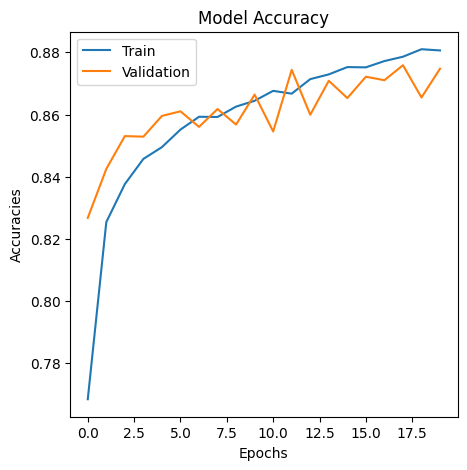

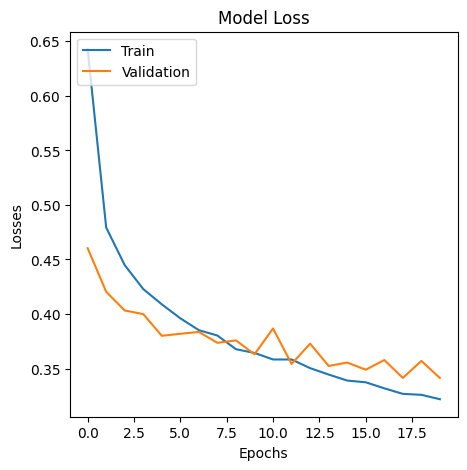

In [52]:
displayGraphs(vgg_history)

### RESNet152V2

use a pretrained RESNet152V2 and replace its fully connected network with a new one that I hope it will produce a good accuracy.

#### Build model

In [53]:
from keras.applications import ResNet152V2

def ResNet_builder():

    # convert the 1 dimension gray image to 3 duplicated dimensions to be able to pass them to the model
    img_input = Input(shape=(img_size_target, img_size_target, 1))
    img_conc = Concatenate()([img_input, img_input, img_input])  

    # create the base pre-trained model
    base_model = ResNet152V2(weights='imagenet', include_top=False, input_tensor=img_conc)

    x = base_model.output
    # adding a average pooling layer
    x = GlobalMaxPooling2D()(x)
    # adding a fully-connected layer with relu activation
    x = Dense(1024, activation='relu')(x)
    # adding a dropout layer
    x = Dropout(0.4)(x)
    # adding a fully-connected layer with relu activation
    x = Dense(512, activation='relu')(x)
    # adding a dropout layer
    x = Dropout(0.4)(x)
    # adding a fully-connected layer with relu activation
    x = Dense(128, activation='relu')(x)
    # adding the output layer which has 10 classes with a softmax
    predictions = Dense(10, activation='softmax')(x)

    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)

    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all convolutional InceptionV3 layers
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model

#### Display the model

234545216/234545216 [==============================] - 13s 0us/step
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.524364 to fit



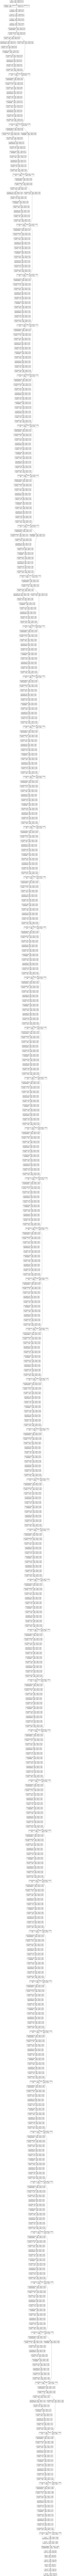

In [54]:
resnet_model = ResNet_builder()
plot_model(resnet_model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

#### Train the model

In [56]:
stop_early = EarlyStopping(patience=5)
# lr_scheduler = LearningRateScheduler(scheduler)
res_history = resnet_model.fit(X_train_tune, y_train_tune, epochs=20, batch_size=50, validation_data=(X_val_tune, y_val_tune), callbacks=[stop_early])

Epoch 1/20
972/972 [==============================] - 52s 37ms/step - loss: 0.8144 - accuracy: 0.7067 - val_loss: 0.6788 - val_accuracy: 0.7469
Epoch 2/20
972/972 [==============================] - 31s 32ms/step - loss: 0.6424 - accuracy: 0.7652 - val_loss: 0.6155 - val_accuracy: 0.7741
Epoch 3/20
972/972 [==============================] - 34s 35ms/step - loss: 0.5982 - accuracy: 0.7792 - val_loss: 0.5968 - val_accuracy: 0.7860
Epoch 4/20
972/972 [==============================] - 33s 34ms/step - loss: 0.5696 - accuracy: 0.7906 - val_loss: 0.6007 - val_accuracy: 0.7821
Epoch 5/20
972/972 [==============================] - 34s 35ms/step - loss: 0.5429 - accuracy: 0.7982 - val_loss: 0.5787 - val_accuracy: 0.7891
Epoch 6/20
972/972 [==============================] - 31s 32ms/step - loss: 0.5214 - accuracy: 0.8063 - val_loss: 0.5778 - val_accuracy: 0.7951
Epoch 7/20
972/972 [==============================] - 33s 34ms/step - loss: 0.5047 - accuracy: 0.8117 - val_loss: 0.5873 - val_accuracy:

#### Evaluate the model

In [57]:
# check model generalization
res_scores = resnet_model.evaluate(X_test, y_test)
print(res_scores)
print(f'Score for: {resnet_model.metrics_names[0]} of {res_scores[0]}; {resnet_model.metrics_names[1]} of {res_scores[1] * 100}%')

188/188 [==============================] - 6s 28ms/step - loss: 0.5819 - accuracy: 0.7957
[0.5818736553192139, 0.7956971526145935]
Score for: loss of 0.5818736553192139; accuracy of 79.56971526145935%


#### Display graphs

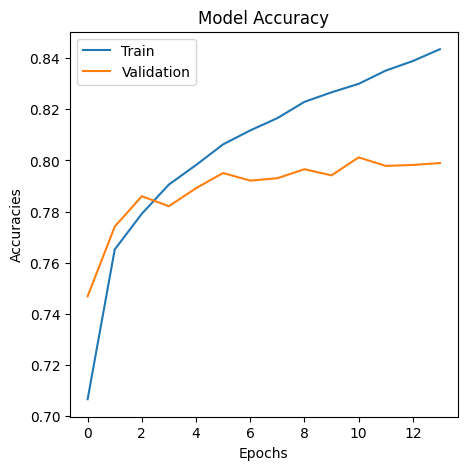

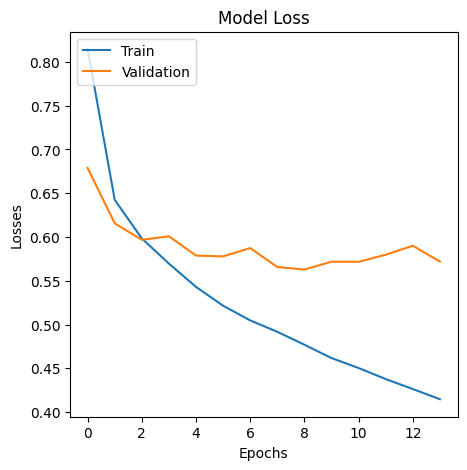

In [58]:
displayGraphs(res_history)

### DenseNet201

use a pretrained DenseNet201 and replace its fully connected network with a new one that I hope it will produce a good accuracy.

#### Build model

In [59]:
from keras.applications import DenseNet201

def DenseNet_builder():

    # convert the 1 dimension gray image to 3 duplicated dimensions to be able to pass them to the model
    img_input = Input(shape=(img_size_target, img_size_target, 1))
    img_conc = Concatenate()([img_input, img_input, img_input])  

    # create the base pre-trained model
    base_model = DenseNet201(weights='imagenet', include_top=False, input_tensor=img_conc)

    x = base_model.output
    # adding a average pooling layer
    x = GlobalMaxPooling2D()(x)
    # adding a fully-connected layer with relu activation
    x = Dense(1024, activation='relu')(x)
    # adding a dropout layer
    x = Dropout(0.4)(x)
    # adding a fully-connected layer with relu activation
    x = Dense(512, activation='relu')(x)
    # adding a dropout layer
    x = Dropout(0.4)(x)
    # adding a fully-connected layer with relu activation
    x = Dense(128, activation='relu')(x)
    # adding the output layer which has 10 classes with a softmax
    predictions = Dense(10, activation='softmax')(x)

    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)

    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all convolutional InceptionV3 layers
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model

#### Display the model

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.524364 to fit



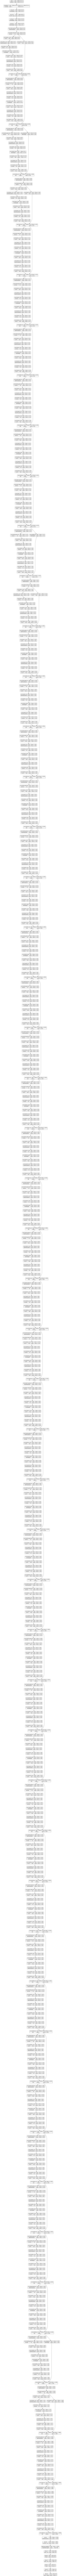

In [60]:
densenet_model = ResNet_builder()
plot_model(densenet_model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

#### Train the model

In [61]:
stop_early = EarlyStopping(patience=5)
# lr_scheduler = LearningRateScheduler(scheduler)
dense_history = densenet_model.fit(X_train_tune, y_train_tune, epochs=20, batch_size=50, validation_data=(X_val_tune, y_val_tune), callbacks=[stop_early])

Epoch 1/20
972/972 [==============================] - 43s 35ms/step - loss: 0.8162 - accuracy: 0.7079 - val_loss: 0.6766 - val_accuracy: 0.7532
Epoch 2/20
972/972 [==============================] - 30s 31ms/step - loss: 0.6409 - accuracy: 0.7660 - val_loss: 0.6184 - val_accuracy: 0.7706
Epoch 3/20
972/972 [==============================] - 33s 34ms/step - loss: 0.5971 - accuracy: 0.7796 - val_loss: 0.6020 - val_accuracy: 0.7841
Epoch 4/20
972/972 [==============================] - 31s 32ms/step - loss: 0.5683 - accuracy: 0.7915 - val_loss: 0.5887 - val_accuracy: 0.7856
Epoch 5/20
972/972 [==============================] - 33s 34ms/step - loss: 0.5412 - accuracy: 0.7992 - val_loss: 0.5726 - val_accuracy: 0.7895
Epoch 6/20
972/972 [==============================] - 33s 34ms/step - loss: 0.5230 - accuracy: 0.8051 - val_loss: 0.5684 - val_accuracy: 0.7967
Epoch 7/20
972/972 [==============================] - 33s 34ms/step - loss: 0.5035 - accuracy: 0.8122 - val_loss: 0.5839 - val_accuracy:

#### Evaluate the model

In [62]:
# check model generalization
dense_scores = densenet_model.evaluate(X_test, y_test)
print(dense_scores)
print(f'Score for: {densenet_model.metrics_names[0]} of {dense_scores[0]}; {densenet_model.metrics_names[1]} of {dense_scores[1] * 100}%')

188/188 [==============================] - 5s 25ms/step - loss: 0.5788 - accuracy: 0.8015
[0.5787563323974609, 0.8015343546867371]
Score for: loss of 0.5787563323974609; accuracy of 80.1534354686737%


#### Display graphs

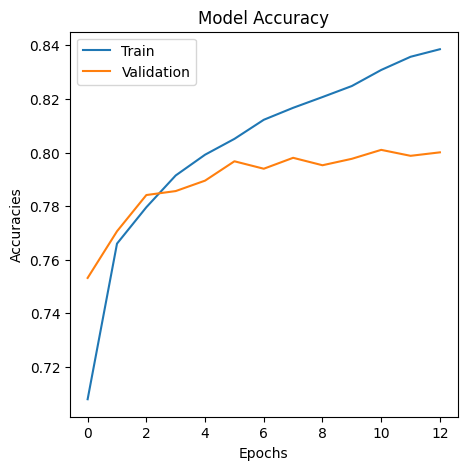

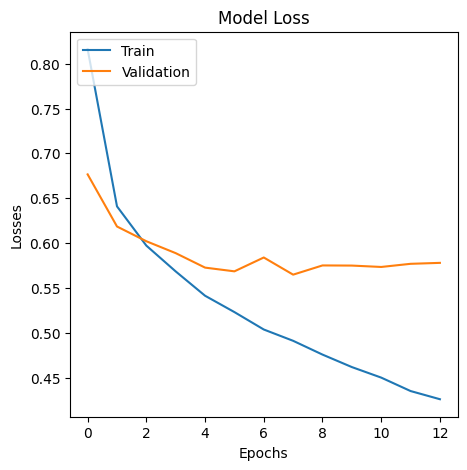

In [63]:
displayGraphs(dense_history)